In [1]:
import pandas as pd
import os
import functions, remove_stopwords
# import seaborn as sns


In [2]:

Path = "./New Folder With Items/"
filelist = os.listdir(Path)
txt_files = []
file_names = []
num =[]
for i in filelist:
    if i.endswith(".txt"):
        file_names.append(i)
        with open(Path + i, 'r', encoding='utf8') as f:
            data = f.read()
            txt_files.append(data)
            words = data.split()
            num.append(len(words))
print(num)
           

[6565, 428, 782, 449, 937, 3540, 1294, 1500, 2457, 242, 3302, 485, 780, 285, 318, 3921, 4244, 778, 70, 349, 1345, 1849, 2258, 3682, 4131, 1301, 3845, 3999, 2792, 366, 4131, 3669, 374, 740, 884, 769, 3457, 1301, 222, 2761, 2191, 4735, 310, 5701, 2772, 2792, 403, 4388, 1672, 6, 4328, 108, 331, 575, 3919, 2342, 2470, 5648, 2052, 747, 4260, 173, 398, 2335, 32044, 2216, 755, 3511, 838, 898, 807, 1392, 1020, 573, 2457, 0, 4328, 4869]


In [3]:
preprocessed_files = [ functions.preprocess_text(i) for i in txt_files ]

In [4]:
distrubutions = [functions.generate_distrubution(i) for i in preprocessed_files]

In [5]:
Df = pd.DataFrame(distrubutions,
                  columns=['Condition', 'Generalization',
                        'Modality', 'Numeric quantifier',
                           'Num Vague Terms', 'Percentage Vague'],
                 index = file_names)
Df[Df['Num Vague Terms']!=0].to_csv('./Distrubution.csv')
Df[Df['Num Vague Terms']==0].to_csv('./No_Terms.csv')

In [6]:
Df[ Df['Num Vague Terms']!=0 ]
Df["Name"] = Df.index
Df["Name"] = Df["Name"].map(lambda x: str(x)[:-4])
Df["Name"]= Df["Name"].str.replace("-"," ")
Df["Name"]= Df["Name"].str.replace(","," ")
Df = Df.set_index("Name")

In [7]:
print("OVERALL AVERAGE")
for i in Df:
    print(i, ": ", Df[Df['Num Vague Terms'] != 0][i].mean())

OVERALL AVERAGE
Condition :  10.313175544609607
Generalization :  3.0002276178516714
Modality :  66.51224222395548
Numeric quantifier :  20.17435461358322
Num Vague Terms :  48.86666666666667
Percentage Vague :  3.6868679209764266


In [8]:
# Df.index

In [9]:
Df["Name"] = Df.index
Df["Name"] = Df["Name"].map(lambda x: str(x)[:-4])
Df["Name"]= Df["Name"].str.replace("-"," ")
Df["Name"]= Df["Name"].str.replace(","," ")

In [10]:
Df

,Condition,Generalization,Modality,Numeric quantifier,Num Vague Terms,Percentage Vague,Name
Name,,,,,,,
BYJU'S–TheLearningApp,7.920792,2.970297,64.356436,24.752475,101,2.949766,BYJU'S–TheLearnin
FLStudioMobile,0.000000,0.000000,100.000000,0.000000,3,1.123596,FLStudioMo
RhythmwithTabla&TanpuraPREMIUM,12.500000,6.250000,50.000000,31.250000,16,3.864734,RhythmwithTabla&TanpuraPRE
CryptoTabBrowserPro—mineonaPROlevel,11.111111,0.000000,77.777778,11.111111,9,3.734440,CryptoTabBrowserPro—mineonaPROl
KWGTKustomWidgetProKey,11.764706,5.882353,47.058824,35.294118,17,3.142329,KWGTKustomWidgetPr
...,...,...,...,...,...,...,...
SDMaidPro Unlocker,0.000000,7.142857,21.428571,71.428571,14,4.827586,SDMaidPro Unlo
FlipkartOnlineShoppingApp,9.090909,3.636364,65.454545,21.818182,55,4.107543,FlipkartOnlineShoppin
ScreenMirroringProApp,0.000000,0.000000,0.000000,0.000000,0,0.000000,ScreenMirroringPr


In [11]:
Df['Num'] = num

In [12]:
Df

,Condition,Generalization,Modality,Numeric quantifier,Num Vague Terms,Percentage Vague,Name,Num
Name,,,,,,,,
BYJU'S–TheLearningApp,7.920792,2.970297,64.356436,24.752475,101,2.949766,BYJU'S–TheLearnin,6565
FLStudioMobile,0.000000,0.000000,100.000000,0.000000,3,1.123596,FLStudioMo,428
RhythmwithTabla&TanpuraPREMIUM,12.500000,6.250000,50.000000,31.250000,16,3.864734,RhythmwithTabla&TanpuraPRE,782
CryptoTabBrowserPro—mineonaPROlevel,11.111111,0.000000,77.777778,11.111111,9,3.734440,CryptoTabBrowserPro—mineonaPROl,449
KWGTKustomWidgetProKey,11.764706,5.882353,47.058824,35.294118,17,3.142329,KWGTKustomWidgetPr,937
...,...,...,...,...,...,...,...,...
SDMaidPro Unlocker,0.000000,7.142857,21.428571,71.428571,14,4.827586,SDMaidPro Unlo,573
FlipkartOnlineShoppingApp,9.090909,3.636364,65.454545,21.818182,55,4.107543,FlipkartOnlineShoppin,2457
ScreenMirroringProApp,0.000000,0.000000,0.000000,0.000000,0,0.000000,ScreenMirroringPr,0


In [13]:
%ls

Distrubution.csv           __pycache__/
New Folder With Items/     app.py
No_Terms.csv               functions.py
Policies.zip               nltk_setup.sh
PolicyCat_CSV_plots.ipynb  queries.json
PolicyCats.csv             remove_stopwords.py
Procfile                   requirements.txt
Script.ipynb               setup.sh
Streamlit.py               skillport.png
StreamlitText.py


In [14]:
cat= pd.read_csv("PolicyCats.csv" )

In [15]:
plot = cat['Category'].value_counts()

In [16]:
plot = pd.DataFrame(plot)

<AxesSubplot:>

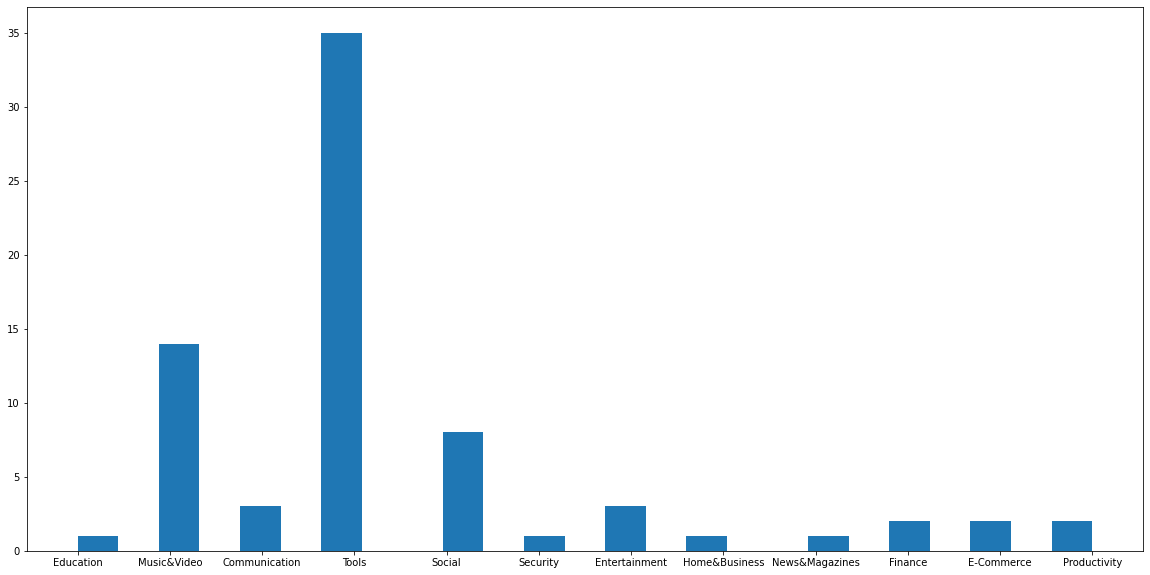

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cat.iloc[:, 1].hist(grid = False, bins = 25)
